## Ex3 Radial Basis Function Neural Network

<ipython-input-3-9dafdac7aea9>:50: DeprecationWarning: scipy.sin is deprecated and will be removed in SciPy 2.0.0, use numpy.sin instead
  y = sin(3*(x+0.5)**3 - 1)
<ipython-input-3-9dafdac7aea9>:21: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  G = zeros((X.shape[0], self.numCenters), float)
<ipython-input-3-9dafdac7aea9>:18: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return exp(-self.beta * norm(c-d)**2)
<ipython-input-3-9dafdac7aea9>:39: DeprecationWarning: scipy.dot is deprecated and will be removed in SciPy 2.0.0, use numpy.dot instead
  self.W = dot(pinv(G), Y)
<ipython-input-3-9dafdac7aea9>:43: DeprecationWarning: scipy.dot is deprecated and will be removed in SciPy 2.0.0, use numpy.dot instead
  Y = dot(G, self.W)


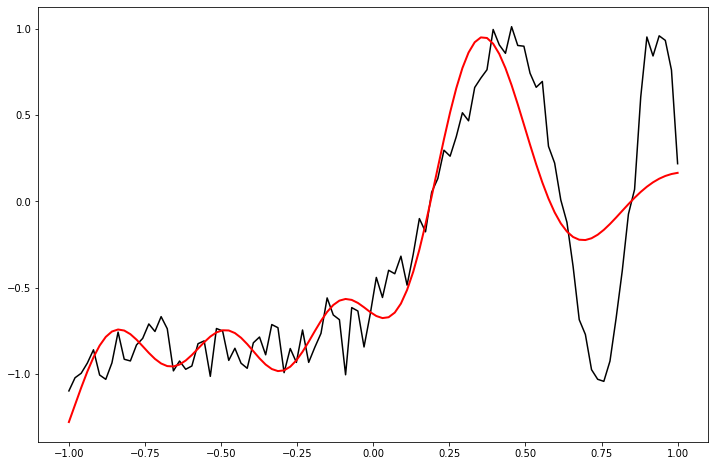

In [3]:
from scipy import *  
from scipy.linalg import norm, pinv  
from matplotlib import pyplot as plt  
class RBF:  
    def __init__(self, indim, numCenters, outdim):  
        self.indim = indim  
        self.outdim = outdim  
        self.numCenters = numCenters  
        #Here we initialize the center corresponding to the hidden neuron of RBF
        self.centers = [random.uniform(-1, 1, indim) for i in range(numCenters)]  
                 #Here we are two important parameters that define the RBF network..
                 #The first parameter represents β, the second represents the connection weight
        self.beta = 8  
        self.W = random.random((self.numCenters, self.outdim))  
           
    def _basisfunc(self, c, d):  
        assert len(d) == self.indim  
        return exp(-self.beta * norm(c-d)**2)  
    def _calcAct(self, X):  
        # calculate activations of RBFs  
        G = zeros((X.shape[0], self.numCenters), float)  
        for ci, c in enumerate(self.centers):  
            for xi, x in enumerate(X):  
                G[xi,ci] = self._basisfunc(c, x)  
        return G  
         #Pass x and y values ​​for training   
    def train(self, X, Y):  
        """ X: matrix of dimensions n x indim  
            y: column vector of dimension n x 1 """  
          # choose random center vectors from training set  
        rnd_idx = random.permutation(X.shape[0])[:self.numCenters]  
        self.centers = [X[i,:] for i in rnd_idx]  
        #The center of operation is: [76 21 58 61 2 1 64 77 34 33]   
        #print ("center", self.centers)  
        # calculate activations of RBFs  
        G = self._calcAct(X)  
        #print (G)  
         # calculate output weights (pseudoinverse)  
        self.W = dot(pinv(G), Y)  
    def test(self, X):  
        """ X: matrix of dimensions n x indim """  
        G = self._calcAct(X)  
        Y = dot(G, self.W)  
        return Y  
if __name__ == '__main__':  
    n = 100  
    x = mgrid[-1:1:complex(0,n)].reshape(n, 1)  
    #print(x)
    # set y and add random noise  
    y = sin(3*(x+0.5)**3 - 1)  
    y += random.normal(0, 0.1, y.shape)  
    # rbf regression  
    rbf = RBF(1, 10, 1)  
    rbf.train(x, y)  
    z = rbf.test(x)  
    # plot original data  
    plt.figure(figsize=(12, 8))  
    plt.plot(x, y, 'k-')  
    # plot learned model  
    plt.plot(x, z, 'r-', linewidth=2)  
    plt.show()
